# Análisis de datos

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sb
pd.options.display.max_columns = 40

In [35]:
df = pd.read_excel('./../datos/DatasetFraud.xlsx')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [36]:
df.shape

(11565, 34)

In [37]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11565.000000,11565.000000,11560.000000,11565.000000,11565.000000,11565.000000,11565.000000,11559.000000,11565.000000,11565.000000
mean,2.784003,2.701167,39.899567,0.059230,7710.474449,8.469780,407.617812,2.493468,1994.865975,22955.978035
std,1.284854,1.258153,13.590556,0.236066,4453.762219,4.618952,43.397393,1.118102,0.801798,26988.811719
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,3851.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,7712.000000,8.000000,400.000000,3.000000,1995.000000,8130.994563
75%,4.000000,4.000000,49.000000,0.000000,11542.000000,12.000000,400.000000,3.000000,1996.000000,46299.646944
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


In [38]:
df.FraudFound_P.value_counts()

0    10880
1      685
Name: FraudFound_P, dtype: int64

In [39]:
df.Sex.value_counts()

Male      9768
Female    1797
Name: Sex, dtype: int64

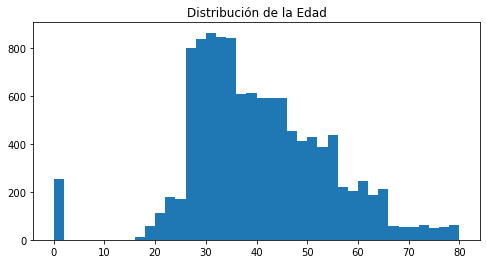

In [40]:
plt.figure(figsize=(8,4))
plt.hist(df.Age, bins=40)
plt.title('Distribución de la Edad')
plt.show()

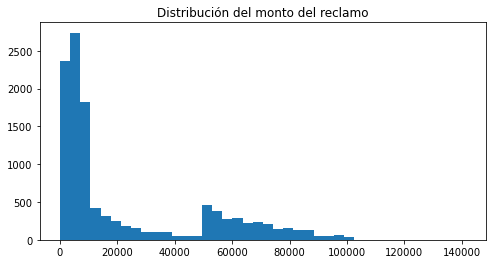

In [41]:
plt.figure(figsize=(8,4))
plt.hist(df.ClaimSize, bins=40)
plt.title('Distribución del monto del reclamo')
plt.show()

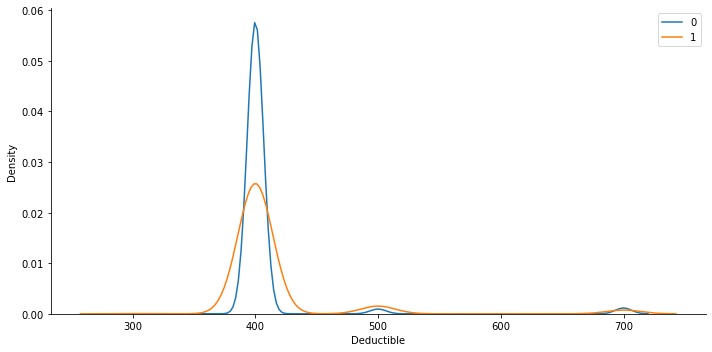

In [42]:
g = sb.FacetGrid(df, hue='FraudFound_P', height = 5, aspect=2)
g.map(sb.kdeplot, 'Deductible')
plt.legend()
plt.show()

In [43]:
df[df.FraudFound_P == 1].groupby('Make')['FraudFound_P'].count().sort_values(ascending=False)


Make
Pontiac      150
Toyota       141
Honda        134
Mazda         91
Chevrolet     75
Accura        45
Ford          25
Saab           6
VW             6
Mercury        4
Saturn         4
Dodge          2
Mecedes        1
Nisson         1
Name: FraudFound_P, dtype: int64

## Preprocesamiento

In [44]:
df_c = df.copy()
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [45]:
df_c.dropna(inplace=True)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11554 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11554 non-null  object 
 1   WeekOfMonth           11554 non-null  int64  
 2   DayOfWeek             11554 non-null  object 
 3   Make                  11554 non-null  object 
 4   AccidentArea          11554 non-null  object 
 5   DayOfWeekClaimed      11554 non-null  object 
 6   MonthClaimed          11554 non-null  object 
 7   WeekOfMonthClaimed    11554 non-null  int64  
 8   Sex                   11554 non-null  object 
 9   MaritalStatus         11554 non-null  object 
 10  Age                   11554 non-null  float64
 11  Fault                 11554 non-null  object 
 12  PolicyType            11554 non-null  object 
 13  VehicleCategory       11554 non-null  object 
 14  VehiclePrice          11554 non-null  object 
 15  FraudFound_P       

In [46]:
# le = LabelEncoder()
# for col in df_c:
#     if len(df_c[col].value_counts()) == 2:
#         le.fit(df_c[col].unique())
#         df_c[col] = le.transform(df_c[col])

In [47]:
df_c.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [48]:
months = {'Dec':12, 'Jan':1, 'Oct':10, 'Jun':6, 'Feb':2, 'Mar':3, 'Aug':8, 'Apr':4, 'Jul':7,
       'May':5, 'Sep':9, 'Nov':11}

In [49]:
weekday = {'Wednesday':3, 'Friday':5, 'Saturday':6, 'Sunday':7, 'Monday':1, 'Tuesday':2,
       'Thursday':4}

In [50]:
df_c.DayOfWeek = df_c.DayOfWeek.apply(lambda day: weekday[day])

In [51]:
df_c = df_c.drop(df_c[df_c.DayOfWeekClaimed == 0].index)
df_c.DayOfWeekClaimed = df_c.DayOfWeekClaimed.apply(lambda day: weekday[day])

In [52]:
df_c.Month = df_c.Month.apply(lambda month: months[month])

In [53]:
df_c.MonthClaimed = df_c.MonthClaimed.apply(lambda month: months[month])


In [54]:
df_c.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,12,5,3,Honda,Urban,2,1,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,1,3,3,Honda,Urban,1,1,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,10,5,5,Honda,Urban,4,11,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,2,1,6,Honda,Urban,1,2,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [55]:
df_v = df_c.copy()
df_v = pd.get_dummies(df_v)

In [56]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_v.drop('FraudFound_P', axis=1))

In [57]:
Y = df_v.FraudFound_P.values

In [58]:
pca = PCA(n_components=2, random_state=1)
df_v_pca = pca.fit_transform(X_scaled)

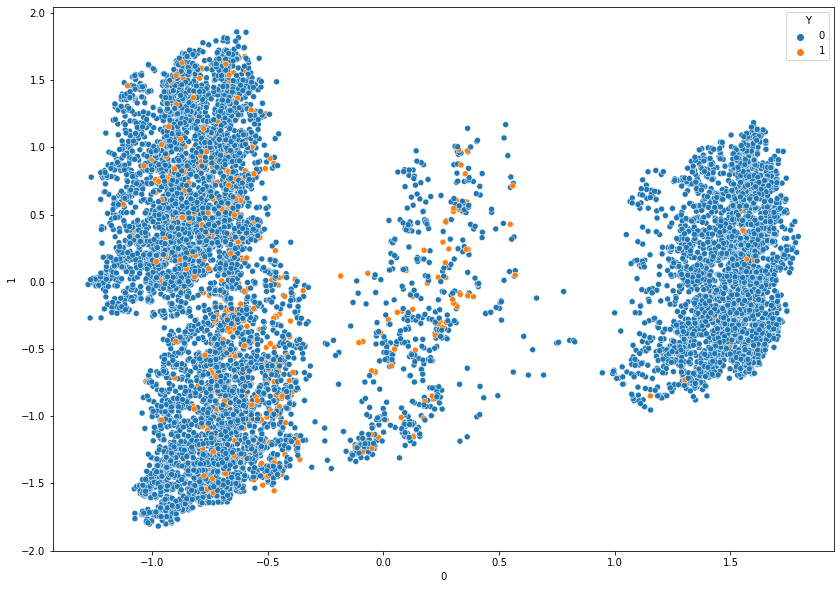

In [59]:
plt.figure(figsize=(14,10))
df_visual = pd.DataFrame(df_v_pca)
df_visual['Y']=Y
sb.scatterplot(data=df_visual, x=0, y=1, hue='Y')
plt.show()

In [60]:
tsvd = TruncatedSVD(n_components=2, random_state=1)
df_v_tsvd = tsvd.fit_transform(X_scaled)

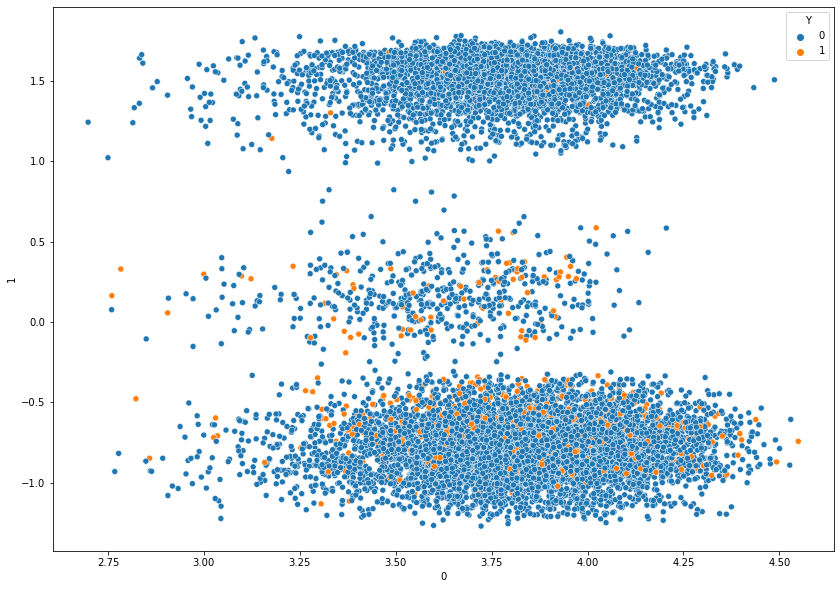

In [61]:
plt.figure(figsize=(14,10))
df_visual = pd.DataFrame(df_v_tsvd)
df_visual['Y']=Y
sb.scatterplot(data=df_visual, x=0, y=1, hue='Y')
plt.show()

In [62]:
from umap import UMAP

In [63]:
umap_m = UMAP(n_components=2, random_state=1, n_neighbors=5)
df_umap = umap_m.fit_transform(X_scaled)

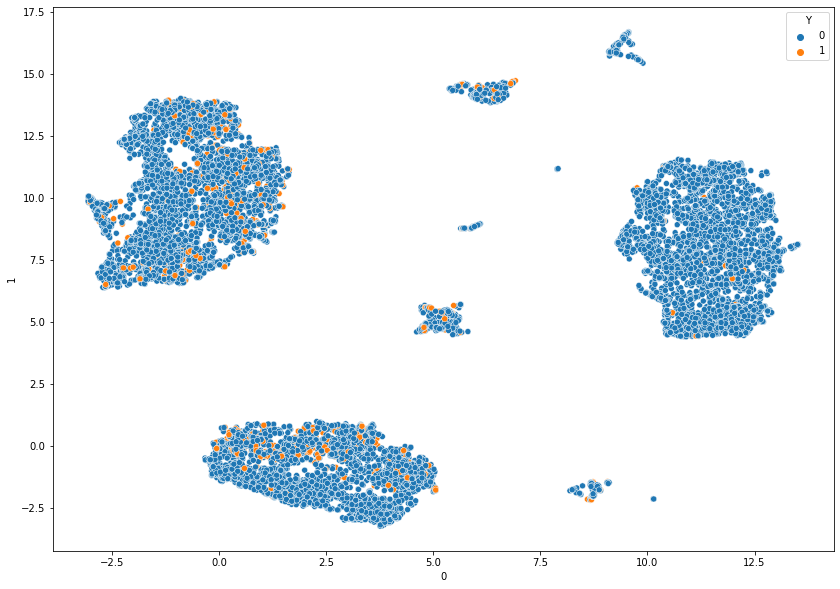

In [64]:
plt.figure(figsize=(14,10))
df_visual = pd.DataFrame(df_umap)
df_visual['Y']=Y
sb.scatterplot(data=df_visual, x=0, y=1, hue='Y')
plt.show()

## Clustering

In [65]:
dbscan = DBSCAN(eps=3, n_jobs=-1)
dbscan.fit(df_umap)

DBSCAN(eps=3, n_jobs=-1)

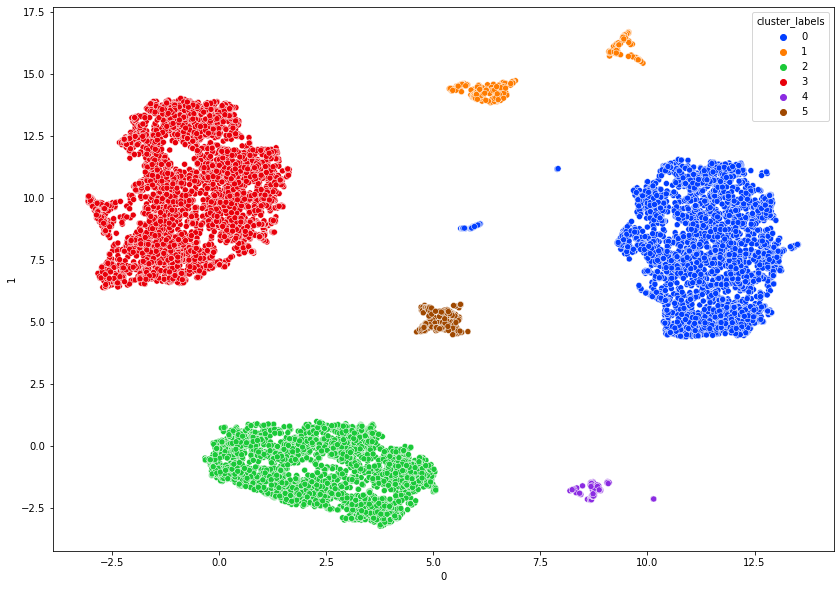

In [66]:
df_visual['cluster_labels'] = dbscan.labels_
plt.figure(figsize=(14,10))
sb.scatterplot(data=df_visual, x=0, y=1, hue='cluster_labels', palette='bright')
plt.show()